<a href="https://colab.research.google.com/github/ayanmmm/Assignment8/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing
import pylab as pl
import itertools
%matplotlib inline


How Much is Your Car Worth?
Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

1.Price: suggested retail price of the used 2005 GM car in excellent condition.

2.Mileage: number of miles the car has been driven

3.Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet

4.Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier

5.Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D

6.Type: body type such as sedan, coupe, etc.

7.Cylinder: number of cylinders in the engine

8.Liter: a more specific measure of engine size

9.Doors: number of doors

10.Cruise: indicator variable representing whether the car has cruise control (1 = cruise)

11.Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)

12.Leather: indicator variable representing whether the car has leather seats (1 = leather)

**Tasks, Part 1**

1.Find the linear regression equation for mileage vs price.

2.Chart the original data and the equation on the chart.

3.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

**Tasks, Part 2**

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

2.Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

3.Find the combination of the factors that is the best predictor for price.

**Tasks, Hard Mode**

1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2.Find the best combination of factors to predict price.

In [8]:
df=pd.read_csv('/content/car_data.csv')

In [9]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [10]:
df.shape

(804, 12)

In [11]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [14]:
df.head(2)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [15]:
print(df['Make'].unique())
print("----------------------------------------------------")
print(df['Model'].unique())
print("----------------------------------------------------")
print(df['Trim'].unique())
print("----------------------------------------------------")
print(df['Type'].unique())

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
----------------------------------------------------
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']
----------------------------------------------------
['Sedan 4D' 'CX Sedan 4D' 'CXL Sedan 4D' 'CXS Sedan 4D' 'Custom Sedan 4D'
 'Limited Sedan 4D' 'Special Ed Ultra 4D' 'DHS Sedan 4D' 'DTS Sedan 4D'
 'Hardtop Conv 2D' 'LS Hatchback 4D' 'LS Sedan 4D' 'LT Hatchback 4D'
 'LT Sedan 4D' 'SVM Hatchback 4D' 'SVM Sedan 4D' 'Coupe 2D' 'LS Coupe 2D'
 'LS Sport Coupe 2D' 'LS Sport Sedan 4D' 'Conv 2D' 'SS Sedan 4D'
 'LS MAXX Hback 4D' 'LT MAXX Hback 4D' 'MAXX Hback 4D' 'LT Coupe 2D'
 'SS Coupe 2D' 'GXP Sedan 4D' 'SE Sedan 4D' 'SLE Sedan 4D' 'GT Sedan 4D'
 'GT Coupe 2D' 'GTP Sedan 4D' 'AWD

In [16]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [17]:
finaldf=df[['Price', 'Mileage','Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
finaldf.head(2)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0


In [18]:
df=finaldf

In [19]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_Limit=", lower_limit)
    print("Upper_Limit=", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Price is 12444.242765331575
Lower_Limit= -4393.290277667038
Upper_Limit= 45383.68078365926
Outlier is Presented In Price


Interquartile Range of Mileage is 10589.5
Lower_Limit= -1260.75
Upper_Limit= 41097.25
Outlier is Presented In Mileage


Interquartile Range of Cylinder is 2.0
Lower_Limit= 1.0
Upper_Limit= 9.0
Outlier is Not Presented In Cylinder


Interquartile Range of Liter is 1.5999999999999996
Lower_Limit= -0.1999999999999993
Upper_Limit= 6.199999999999999
Outlier is Not Presented In Liter


Interquartile Range of Doors is 0.0
Lower_Limit= 4.0
Upper_Limit= 4.0
Outlier is Presented In Doors


Interquartile Range of Cruise is 0.0
Lower_Limit= 1.0
Upper_Limit= 1.0
Outlier is Presented In Cruise


Interquartile Range of Sound is 1.0
Lower_Limit= -1.5
Upper_Limit= 2.5
Outlier is Not Presented In Sound


Interquartile Range of Leather is 1.0
Lower_Limit= -1.5
Upper_Limit= 2.5
Outlier is Not Presented In Leather




In [20]:
'''
Lower_Limit= -4393.290277667038
Upper_Limit= 45383.68078365926
Outlier is Presented In Price


Lower_Limit= -1260.75
Upper_Limit= 41097.25
Outlier is Presented In Mileage


Lower_Limit= 4.0
Upper_Limit= 4.0
Outlier is Presented In Doors

Lower_Limit= 1.0
Upper_Limit= 1.0
Outlier is Presented In Cruise
'''


'\nLower_Limit= -4393.290277667038\nUpper_Limit= 45383.68078365926\nOutlier is Presented In Price\n\n\nLower_Limit= -1260.75\nUpper_Limit= 41097.25\nOutlier is Presented In Mileage\n\n\nLower_Limit= 4.0\nUpper_Limit= 4.0\nOutlier is Presented In Doors\n\nLower_Limit= 1.0\nUpper_Limit= 1.0\nOutlier is Presented In Cruise\n'

In [21]:
Lower_Limit= -4393.290277667038
Upper_Limit= 45383.68078365926

In [22]:
df['Price'] = np.where(
    df['Price']>Upper_Limit,
    Upper_Limit,
    np.where(
        df['Price']<Lower_Limit,
        Lower_Limit,
        df['Price']
    ) 
)
df['Price'].describe()

count      804.000000
mean     21099.998496
std       9031.505318
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      45383.680784
Name: Price, dtype: float64

In [23]:
Lower_Limit= -1260.75
Upper_Limit= 41097.25

In [24]:
df['Mileage'] = np.where(
    df['Mileage']>Upper_Limit,
    Upper_Limit,
    np.where(
        df['Mileage']<Lower_Limit,
        Lower_Limit,
        df['Mileage']
    ) 
)
df['Mileage'].describe()

count      804.000000
mean     19807.086132
std       8119.836852
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      41097.250000
Name: Mileage, dtype: float64

In [25]:
Lower_Limit= 4.0
Upper_Limit= 4.0

In [26]:
df['Doors'] = np.where(
    df['Doors']>Upper_Limit,
    Upper_Limit,
    np.where(
        df['Doors']<Lower_Limit,
        Lower_Limit,
        df['Doors']
    ) 
)
df['Doors'].describe()

count    804.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
Name: Doors, dtype: float64

In [27]:
Lower_Limit= 1.0
Upper_Limit= 1.0

In [28]:
df['Cruise'] = np.where(
    df['Cruise']>Upper_Limit,
    Upper_Limit,
    np.where(
        df['Cruise']<Lower_Limit,
        Lower_Limit,
        df['Cruise']
    ) 
)
df['Cruise'].describe()

count    804.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Cruise, dtype: float64

In [29]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower_Limit=", lower_limit)
    print("Upper_Limit=", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Price is 12444.242765331575
Lower_Limit= -4393.290277667038
Upper_Limit= 45383.68078365926
Outlier is Not Presented In Price


Interquartile Range of Mileage is 10589.5
Lower_Limit= -1260.75
Upper_Limit= 41097.25
Outlier is Not Presented In Mileage


Interquartile Range of Cylinder is 2.0
Lower_Limit= 1.0
Upper_Limit= 9.0
Outlier is Not Presented In Cylinder


Interquartile Range of Liter is 1.5999999999999996
Lower_Limit= -0.1999999999999993
Upper_Limit= 6.199999999999999
Outlier is Not Presented In Liter


Interquartile Range of Doors is 0.0
Lower_Limit= 4.0
Upper_Limit= 4.0
Outlier is Not Presented In Doors


Interquartile Range of Cruise is 0.0
Lower_Limit= 1.0
Upper_Limit= 1.0
Outlier is Not Presented In Cruise


Interquartile Range of Sound is 1.0
Lower_Limit= -1.5
Upper_Limit= 2.5
Outlier is Not Presented In Sound


Interquartile Range of Leather is 1.0
Lower_Limit= -1.5
Upper_Limit= 2.5
Outlier is Not Presented In Leather




In [30]:
#All OUTLIERS removed

In [31]:
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,6,3.1,4.0,1.0,1,1
1,17542.036083,9135.0,6,3.1,4.0,1.0,1,0
2,16218.847862,13196.0,6,3.1,4.0,1.0,1,0
3,16336.913140,16342.0,6,3.1,4.0,1.0,0,0
4,16339.170324,19832.0,6,3.1,4.0,1.0,0,1
...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,6,3.0,4.0,1.0,0,0
800,16175.957604,19095.0,6,3.0,4.0,1.0,1,0
801,15731.132897,20484.0,6,3.0,4.0,1.0,1,0
802,15118.893228,25979.0,6,3.0,4.0,1.0,1,0


In [32]:
x=df[['Mileage']]
y=df['Price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)

In [37]:
from sklearn.metrics import  r2_score

In [38]:
rsquared = r2_score(y_test,y_pred)

print("Test data R2_score: {:.2f}".format(rsquared))

Test data R2_score: 0.02


In [39]:
c=model.intercept_
m=model.coef_

In [40]:
print('The Linear Equation is: y= ',m,'x+',c)

The Linear Equation is: y=  [-0.14927169] x+ 24258.185458232256


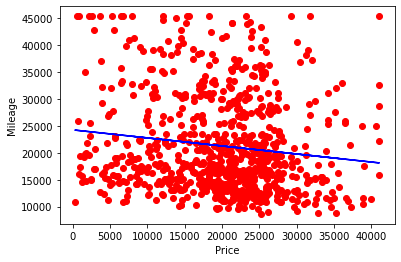

In [41]:
plt.scatter(x,y,color="r")
plt.plot(x, model.predict(x),color='b')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.show()

In [42]:
''' Task 2'''

' Task 2'

In [43]:
df.head(2)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,6,3.1,4.0,1.0,1,1
1,17542.036083,9135.0,6,3.1,4.0,1.0,1,0


In [44]:
x=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y=df["Price"]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [49]:
from sklearn.metrics import  r2_score


In [50]:
#rsquared = r2_score(y_test,y_pred)
y_pred = model.predict(x_test)
#print("Test set R2 of df: {:.2f}".format(rsquared))

print("R_squared: " + str(round(r2_score(y_test,y_pred),2)))

R_squared: 0.38


In [51]:
c=model.intercept_
m=model.coef_

In [52]:
print('The Linear Equation is: y= ',m,'x+',c)

The Linear Equation is: y=  [-1.37366109e-01  1.38480589e+03  2.88009105e+03  2.27373675e-13
  0.00000000e+00 -2.27399424e+03  2.46348766e+03] x+ 7619.646411902217


In [53]:
df.var()

Price       8.156809e+07
Mileage     6.593175e+07
Cylinder    1.925243e+00
Liter       1.222267e+00
Doors       0.000000e+00
Cruise      0.000000e+00
Sound       2.181930e-01
Leather     2.001264e-01
dtype: float64

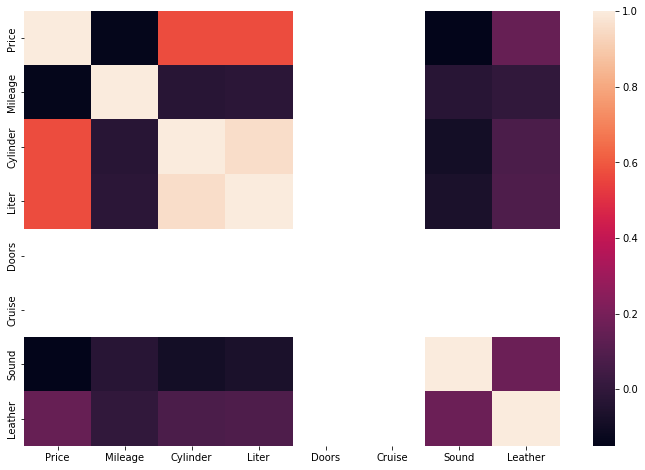

In [54]:
fig_dims = (12,8)
fig,ax=plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),ax=ax)
plt.show()


In [55]:
abs(df.corr()["Price"])

Price       1.000000
Mileage     0.138997
Cylinder    0.569795
Liter       0.570744
Doors            NaN
Cruise           NaN
Sound       0.149583
Leather     0.155412
Name: Price, dtype: float64

In [56]:
abs(df.corr()["Price"][abs(df.corr()["Price"])>0.5].drop('Price')).index.tolist()

['Cylinder', 'Liter']

In [ ]:
''' Task 3'''

In [77]:
df=pd.read_csv('/content/car_data.csv')

In [78]:
df=pd.get_dummies(df,columns=['Make','Model','Type'],drop_first=True)

In [79]:
#
df

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,L300 Sedan 4D,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979,L300 Sedan 4D,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
abs(df.corr()["Price"])

Price                1.000000
Mileage              0.143051
Cylinder             0.569086
Liter                0.558146
Doors                0.138750
Cruise               0.430851
Sound                0.124348
Leather              0.157197
Make_Cadillac        0.659297
Make_Chevrolet       0.404598
Make_Pontiac         0.142095
Make_SAAB            0.335404
Make_Saturn          0.211701
Model_9_3            0.124568
Model_9_3 HO         0.210464
Model_9_5            0.173001
Model_9_5 HO         0.110616
Model_AVEO           0.304437
Model_Bonneville     0.008904
Model_CST-V          0.269009
Model_CTS            0.103515
Model_Cavalier       0.243693
Model_Century        0.060819
Model_Classic        0.087988
Model_Cobalt         0.192644
Model_Corvette       0.287994
Model_Deville        0.296848
Model_G6             0.027338
Model_GTO            0.088464
Model_Grand Am       0.093183
Model_Grand Prix     0.068812
Model_Impala         0.028301
Model_Ion            0.205380
Model_L Se

In [84]:
abs(df.corr()["Price"][abs(df.corr()["Price"])>0.3]).index.tolist()

['Price',
 'Cylinder',
 'Liter',
 'Cruise',
 'Make_Cadillac',
 'Make_Chevrolet',
 'Make_SAAB',
 'Model_AVEO',
 'Model_XLR-V8']

In [85]:
columns=['Price', 'Cylinder', 'Liter', 'Cruise', 'Make_Cadillac', 'Make_Chevrolet', 'Make_SAAB', 'Model_AVEO', 'Model_XLR-V8']
X = df[columns]
y = df['Price']

regr= LinearRegression()
regr.fit(X, y)

LinearRegression()

In [86]:
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X, y))

Intercept: -1.0913936421275139e-11
Coefficient: [ 1.00000000e+00 -6.57122850e-14  4.66344407e-14 -2.03528542e-14
 -3.67481303e-15  6.25643928e-14 -1.45229108e-13  2.07271639e-13
 -4.19961284e-13]
Score: 1.0


In [87]:

best_combo = []
   
for i in range(1, 11):
    best_combo.append(itertools.combinations(features, i))

In [88]:
from pandas.io.formats.info import DataFrameInfoPrinter
best_score = 0
for combin in best_combo:
    for groupx in combin:
        groupx = list(groupx)
        # print(groupx)
        x = df[groupx]
        # print(x.shape)
        # print(y_with_dummies.shape)
        degrees = 8
        
        for degree in range(1, degrees+1):
          model = pipeline.Pipeline([
                  ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
          
          model = model.fit(x, y)
          model_score = model.score(x, y)                   
          # print(model_score)                                                                                                                                                   
        if best_score < model.score(x, y):
          best_score = model.score(x, y)
          maxgroup = groupx
          best_degree = degree
            
print("Degree: ", degree)
print("Best combination of features: ", maxgroup)
print("Best R^2 score: ", best_score)

Degree:  8
Best combination of features:  ['Cylinder', 'Liter', 'Cruise', 'Make_Cadillac', 'Make_Chevrolet', 'Make_SAAB', 'Model_XLR-V8']
Best R^2 score:  0.9377320157017434
